In [1]:
# Kernel PCA - used for non linear problems 

# Data Preprocessing Template

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [2]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [3]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [4]:
#apply PCA here
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explain_variance = pca.explained_variance_ratio_


In [5]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0 )
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [6]:
#predict test set result
y_pred = classifier.predict(X_test)

#making the confusion matrix
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred)

/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_6165/2062804384.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


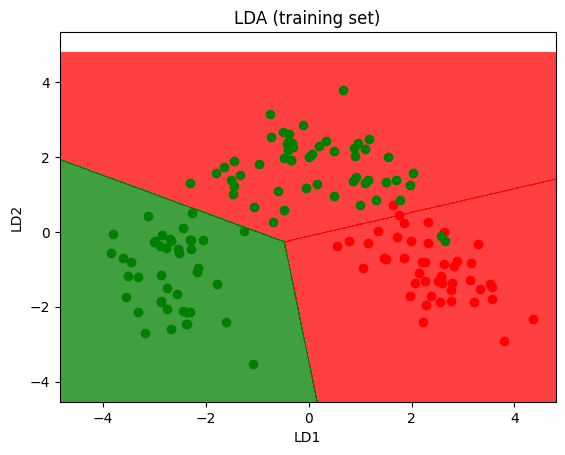

In [7]:
from matplotlib.colors import ListedColormap
# Visualizing the training set results
# Create a custom color map with two colors: red and green
cmap_custom = ListedColormap(['red', 'green'])
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap=cmap_custom)
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c=cmap_custom(i), label=j)

plt.title('LDA (training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


/var/folders/xm/_6m30k1j1kbgb2ps1nz6t4d00000gn/T/ipykernel_6165/4155820181.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


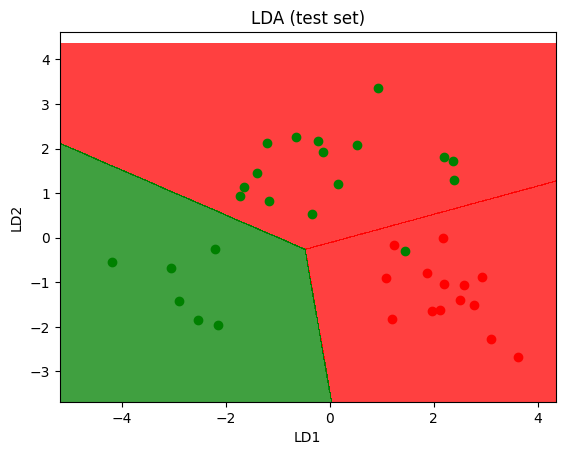

In [8]:
from matplotlib.colors import ListedColormap
# Visualizing the test set results
# Create a custom color map with two colors: red and green
cmap_custom = ListedColormap(['red', 'green'])
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:,0].min() - 1, stop=X_set[:,0].max() + 1, step=0.01), 
                     np.arange(start=X_set[:,1].min() - 1, stop=X_set[:,1].max() + 1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
             alpha=0.75, cmap=cmap_custom)
plt.xlim(X1.min(), X2.max())
plt.ylim(X2.min(), X1.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1], 
                c=cmap_custom(i), label=j)

plt.title('LDA (test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()